<a href="https://colab.research.google.com/github/GuCuChiara/STROKE-Prediction-GitHub-varios-modelos-KNN-SVM-LR-RF-GBC-LGBM-CNN/blob/main/STROKE_Prediction_GitHub_varios_modelos_KNN_SVM_LR_RF_GBC_LGBM_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Stroke Prediction 🧠

In [ ]:
#montamos nuestra unidad de google drive
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

Mounted at /content/gdrive/


## 1 | Importing Libraries and Loading dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# plt.style.use('dark_background')
sns.set_palette("Set2")

In [ ]:
# Ubicación del dataset en Drive:
# About the dataset: https://drive.google.com/file/d/1Yz2WKBXca14TvTDtRXhXkkLwNysXt65q/view?usp=drive_link

In [ ]:
df=pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Data Science/AMS/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## 👉 | About the dataset

* According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

* This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status.
* Each row in the data provides relavant information about the patient.

* Attribute Information:
1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension:
  * 0 if the patient doesn't have hypertension,
  * 1 if the patient has hypertension
5. heart_disease:
  * 0 if the patient doesn't have any heart diseases,
  * 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type:
  * "children",
  * "Govt_jov",
  * "Never_worked",
  * "Private" or
  * "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status:
* "formerly smoked",
* "never smoked",
* "smokes" or
* "Unknown"*
12. stroke:
1 if the patient had a stroke or
0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## 2 | Checking For Null Values

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

The dataset contains some missing values in bmi column.

Let's try to remove them.


In [ ]:
# Eliminar filas con valores nulos en la columna 'bmi'
df = df.dropna(subset=['bmi'])

In [ ]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Our dataset doesn´t contains missing values.



---



## 3 | EDA

In [ ]:
df.shape

(4909, 12)

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [ ]:
# To check for duplicates
df.duplicated().sum()

0

In [ ]:
#storing categorical and continuous columns into separate lists for future purpose
con_cols=['age','avg_glucose_level','bmi']
cat_cols=[]
for i in df.columns:
    if i!='id' and i!='stroke' and i not in con_cols:
        cat_cols.append(i)
cat_cols

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status']

In [ ]:
#Checking value in each categorical column
for i in cat_cols:
    print(f'============Values in {i}============\n{df[i].value_counts()}\n------------------------')

============Values in gender============
Female    2897
Male      2011
Other        1
Name: gender, dtype: int64
------------------------
============Values in hypertension============
0    4458
1     451
Name: hypertension, dtype: int64
------------------------
============Values in heart_disease============
0    4666
1     243
Name: heart_disease, dtype: int64
------------------------
============Values in ever_married============
Yes    3204
No     1705
Name: ever_married, dtype: int64
------------------------
============Values in work_type============
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64
------------------------
============Values in Residence_type============
Urban    2490
Rural    2419
Name: Residence_type, dtype: int64
------------------------
============Values in smoking_status============
never smoked       1852
Unknown            1483
formerly smoked     837
smokes        

In [ ]:
# Only one instance of gender Other is found. Let's remove it.
df.drop(index = df[df['gender']=='Other'].index[0] ,axis=0,inplace=True)

In [ ]:
#Checking value in each categorical column
for i in cat_cols:
    print(f'============Values in {i}============\n{df[i].value_counts()}\n------------------------')

============Values in gender============
Female    2897
Male      2011
Name: gender, dtype: int64
------------------------
============Values in hypertension============
0    4457
1     451
Name: hypertension, dtype: int64
------------------------
============Values in heart_disease============
0    4665
1     243
Name: heart_disease, dtype: int64
------------------------
============Values in ever_married============
Yes    3204
No     1704
Name: ever_married, dtype: int64
------------------------
============Values in work_type============
Private          2810
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64
------------------------
============Values in Residence_type============
Urban    2490
Rural    2418
Name: Residence_type, dtype: int64
------------------------
============Values in smoking_status============
never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name:

In [ ]:
# Only one instance of gender Other is found. Let's remove it.
#rows_to_drop = df[df['gender'] == 'Other'].index
#if len(rows_to_drop) > 0:
#    df.drop(index=rows_to_drop[0], axis=0, inplace=True)
#else:
#    print("No se encontraron filas con 'Other' en la columna 'gender'.")


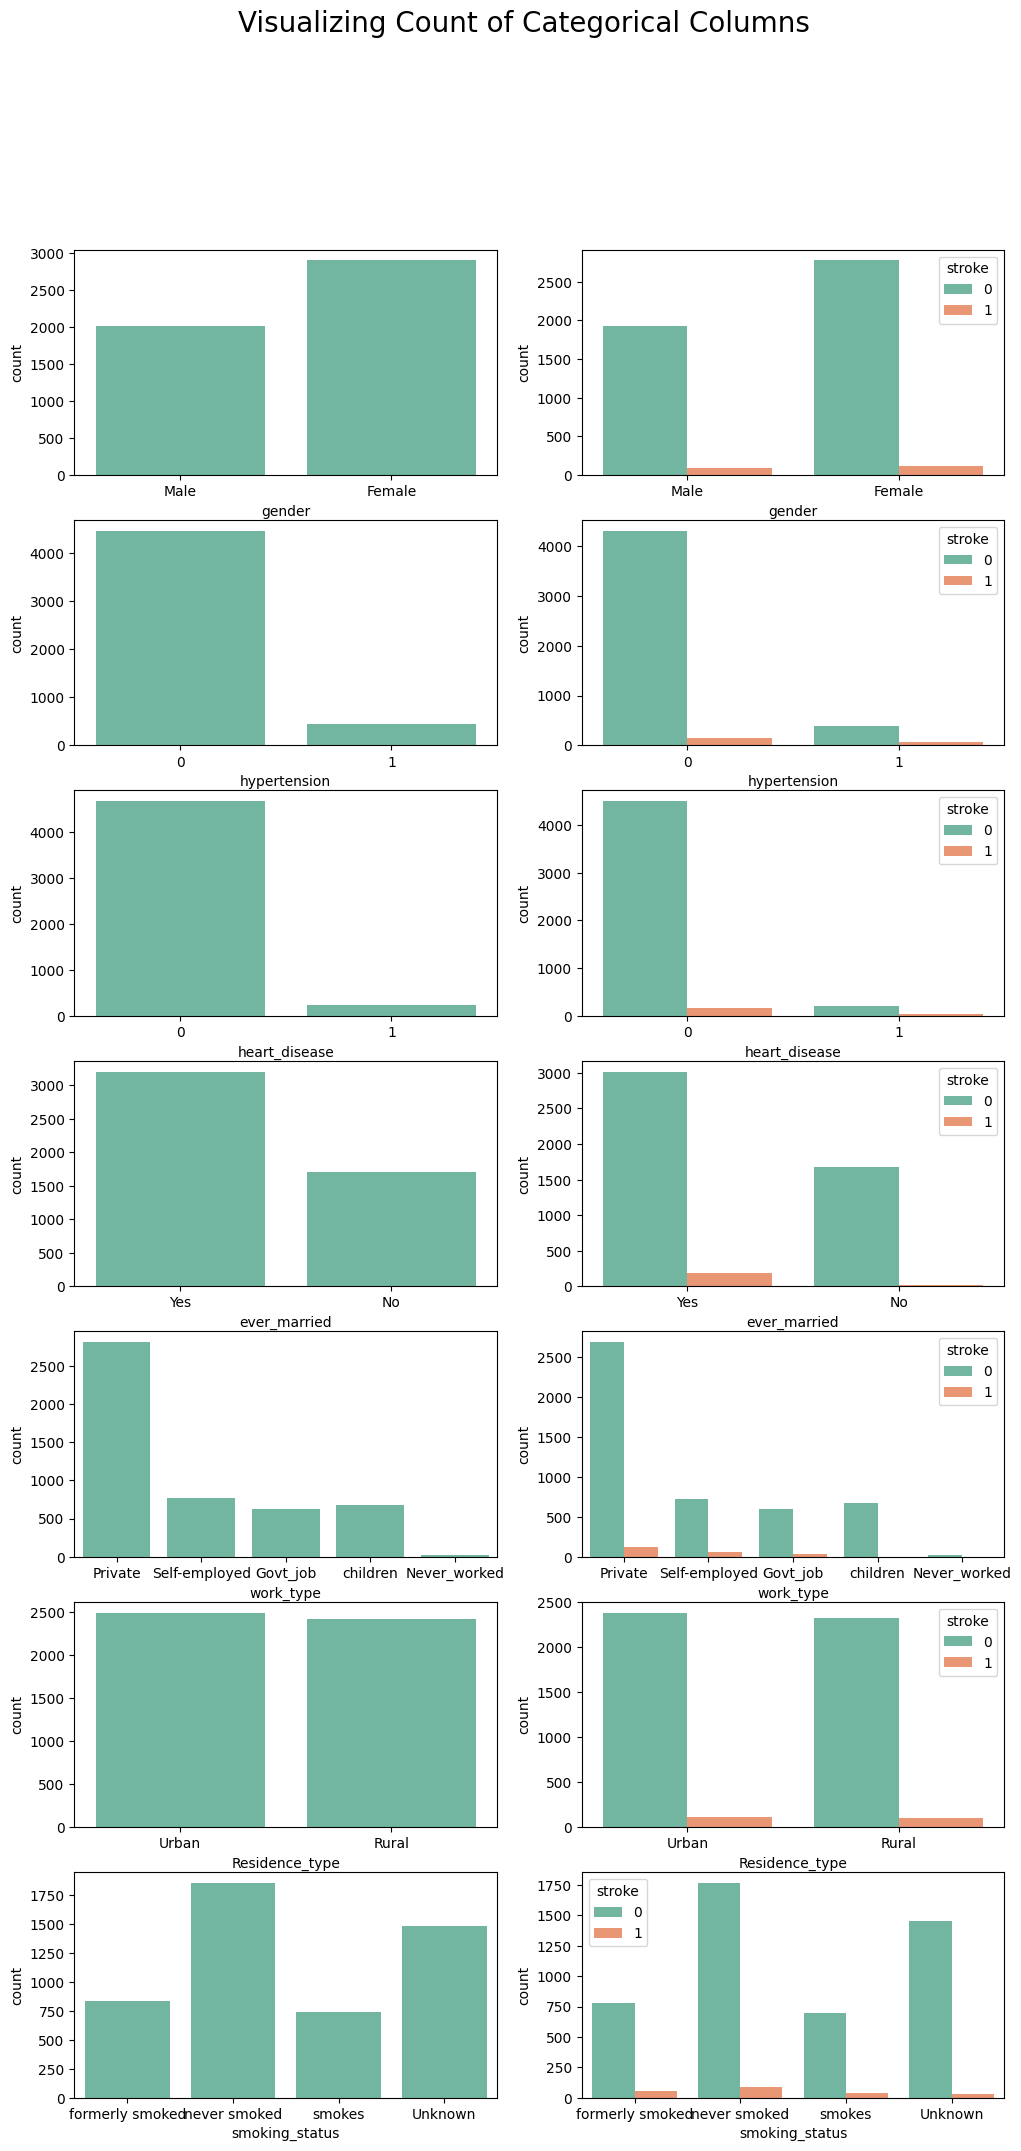

In [ ]:
fig,ax=plt.subplots(7,2,figsize=(12,24))
for index,i in enumerate(cat_cols):
    plt.suptitle("Visualizing Count of Categorical Columns",size=20)
    sns.countplot(data=df,x=i,ax=ax[index,0])
    sns.countplot(data=df,x=i,ax=ax[index,1],hue='stroke')

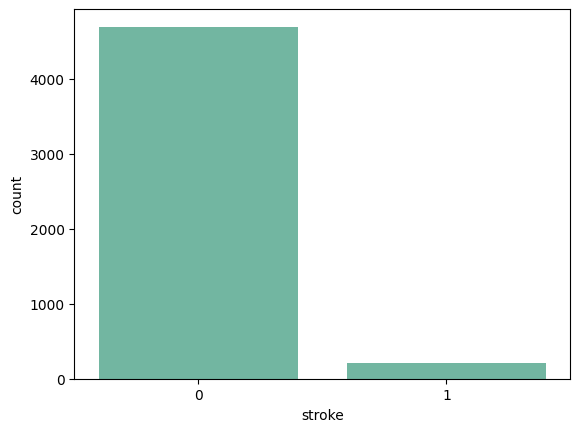

In [ ]:
sns.countplot(data=df,x='stroke')
plt.show()

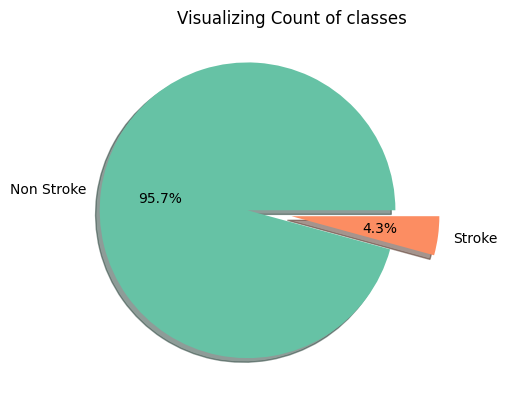

In [ ]:
plt.title("Visualizing Count of classes")
plt.pie(np.array(df['stroke'].value_counts()),labels=['Non Stroke','Stroke'],explode=[0.3,0],autopct='%1.1f%%',shadow=True)
plt.show()

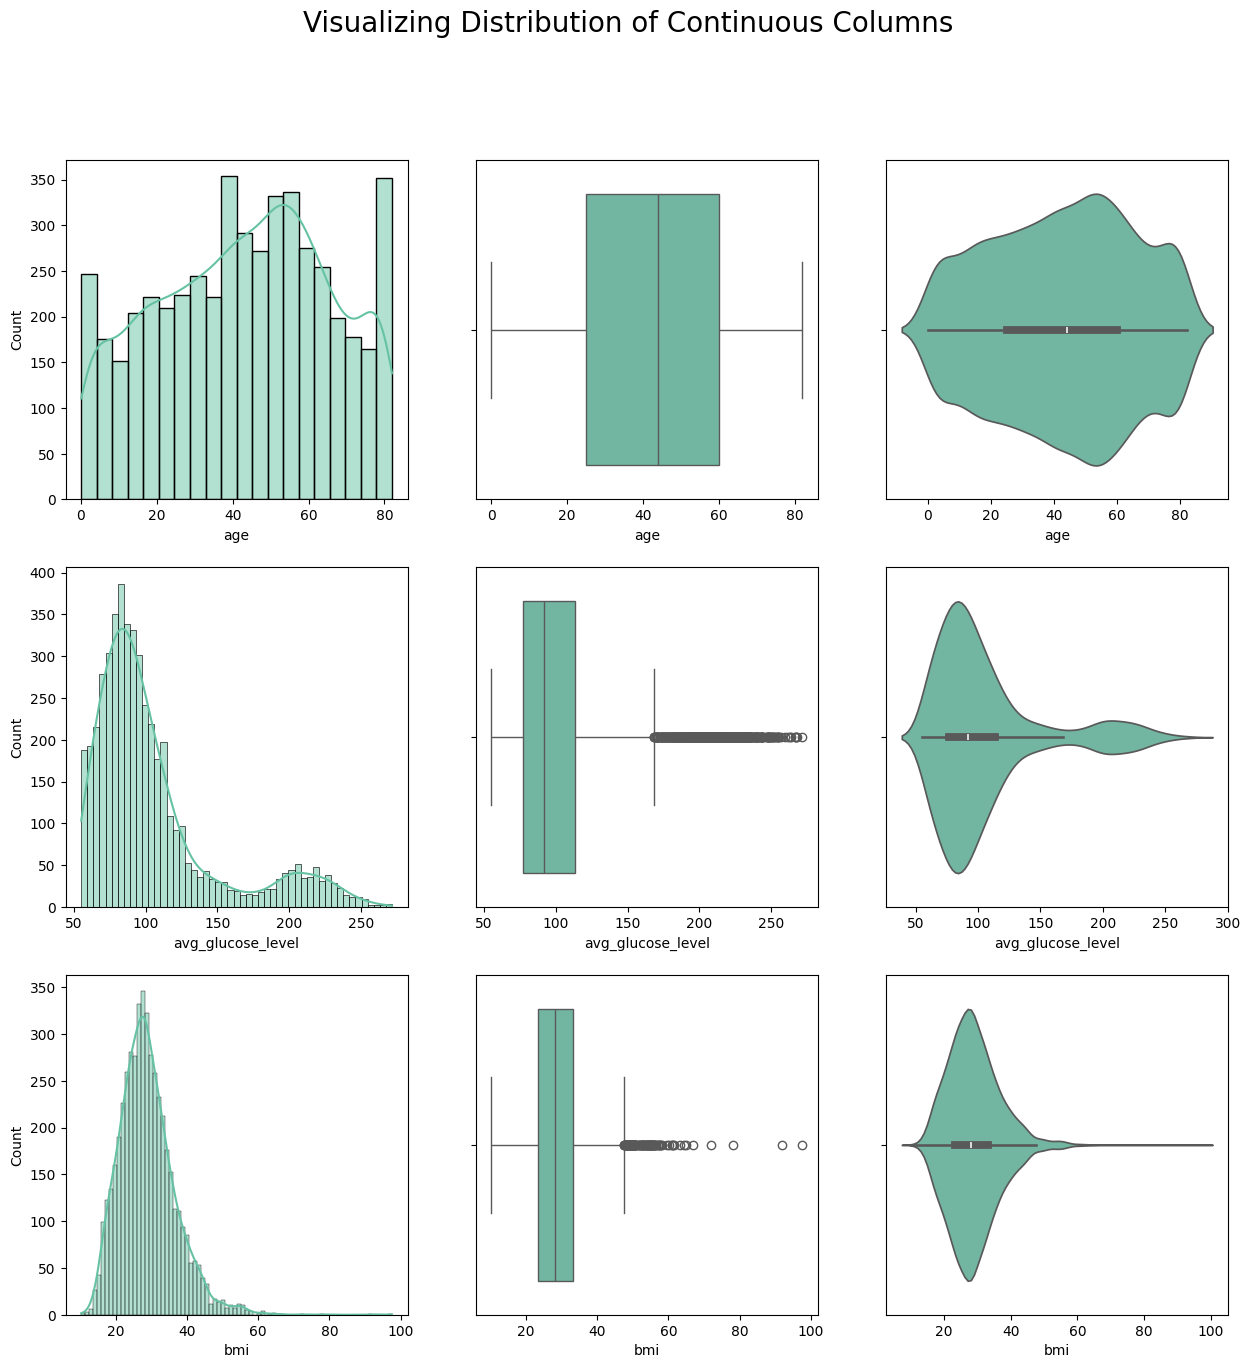

In [ ]:
# A huge imbalance of the classes is found! Would oversample the minority class.
fig,ax=plt.subplots(3,3,figsize=(15,15))
for index,i in enumerate(con_cols):
    plt.suptitle("Visualizing Distribution of Continuous Columns",size=20)
    sns.histplot(df[i],ax=ax[index,0],kde=True)
    sns.boxplot(data=df,x=i,ax=ax[index,1])
    sns.violinplot(data=df,x=i,ax=ax[index,2])

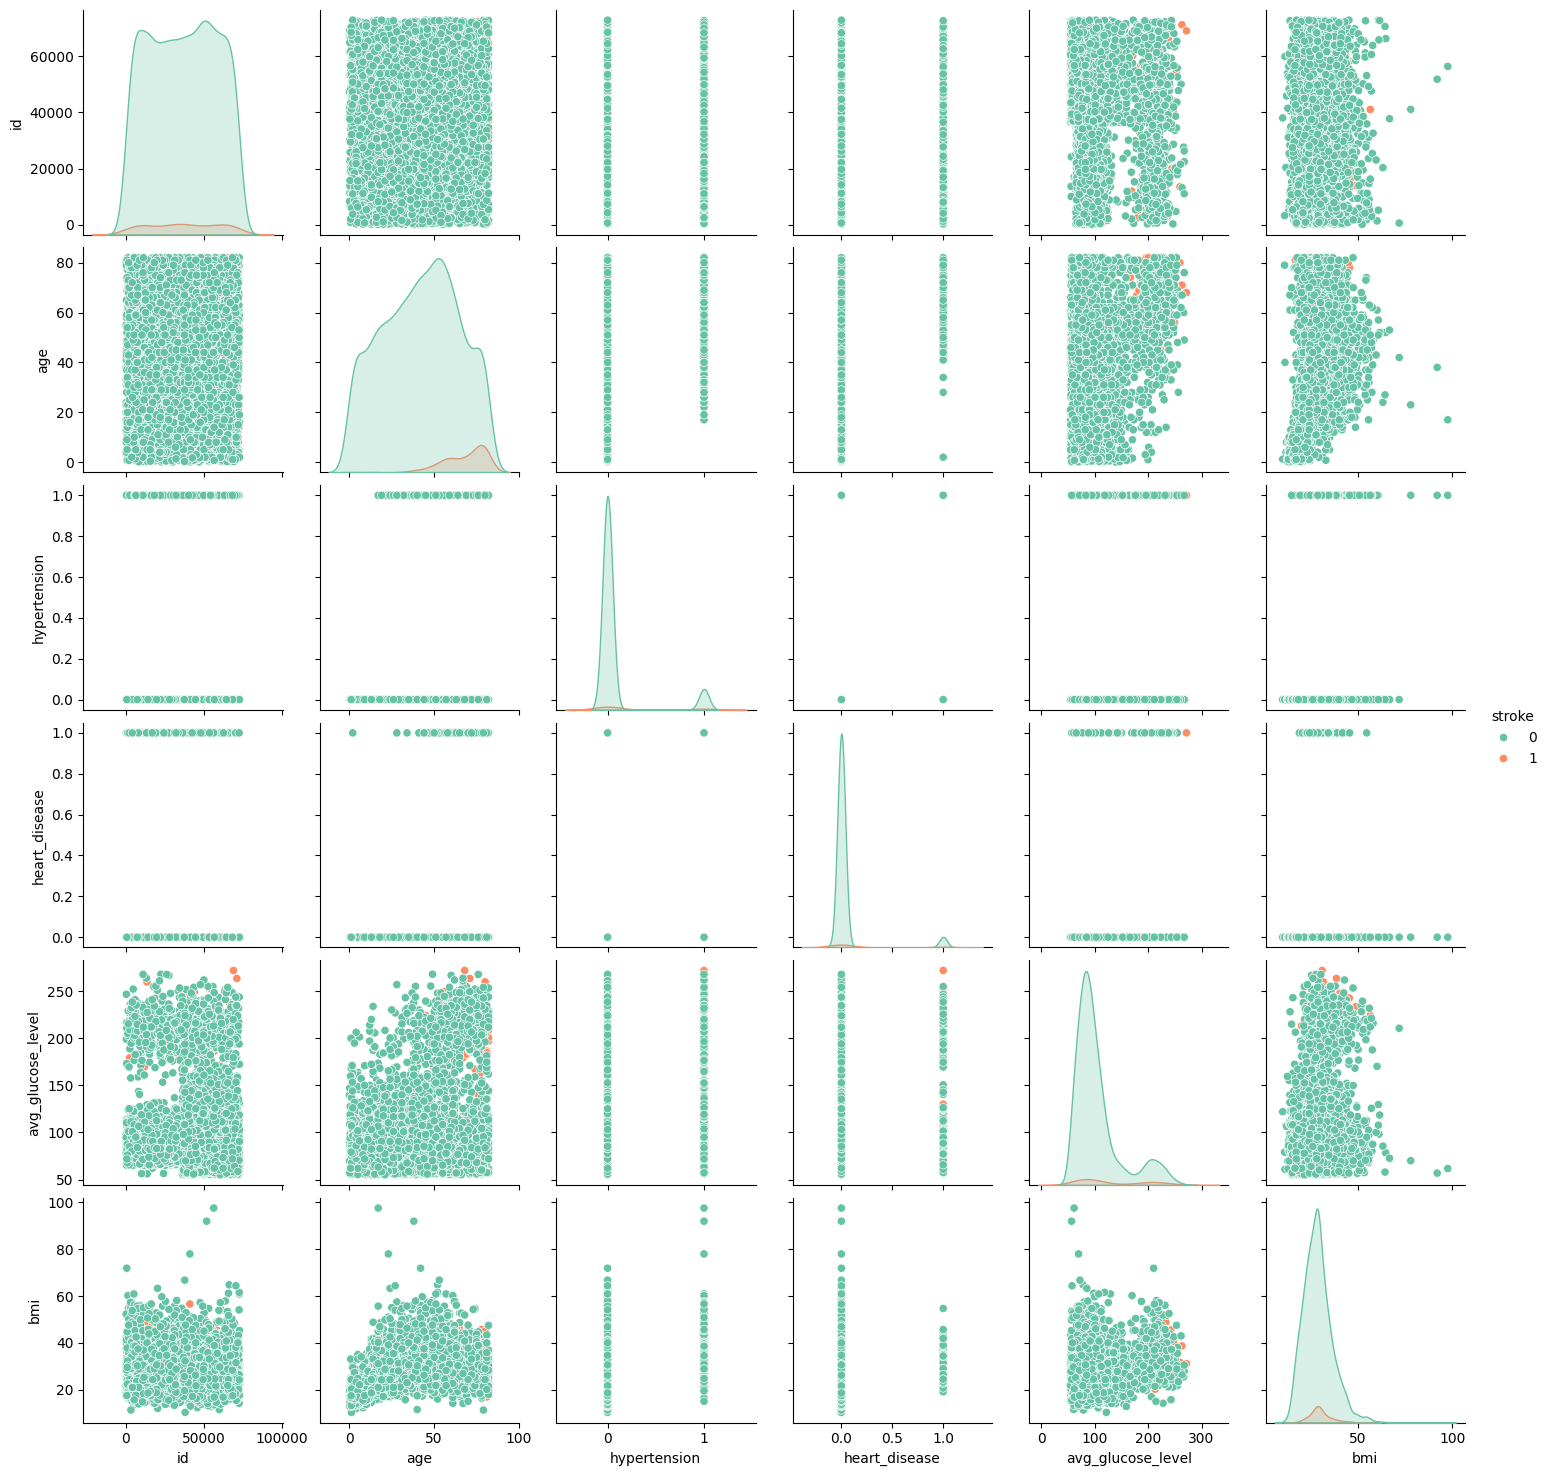

In [ ]:
sns.pairplot(data=df,hue='stroke')

<ipython-input-39-7d7df1acffd0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='0.2f')


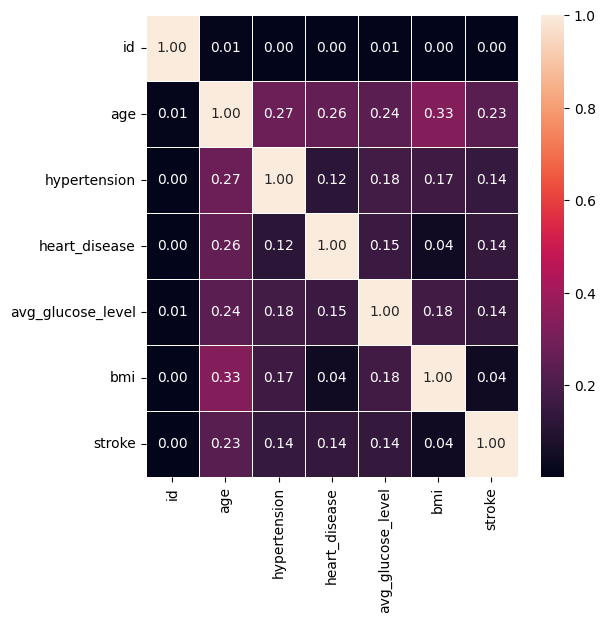

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,fmt='0.2f')
plt.show()



---



## 4 | Data Preprocessing

👉 | Encoding of Categorical columns

In [ ]:
#cat_cols.pop()
df_enc=pd.get_dummies(df[cat_cols],drop_first=True)
#df_enc=df_enc.drop(['age_group_Senior', 'age_group_Teen', 'age_group_Toddler'])
df_enc.head()

,hypertension,heart_disease,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,1,1,0,1,0,0,1,1,0,0
2,0,1,1,1,0,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,1,0,0,1
4,1,0,0,1,0,0,1,0,0,0,1,0
5,0,0,1,1,0,1,0,0,1,1,0,0


In [ ]:
cat_cols

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status']

```
df_enc = pd.get_dummies(df[cat_cols], drop_first=True)
```
* Crea variables ficticias (dummy variables) para las columnas categóricas especificadas en la lista cat_cols del DataFrame df.

* La función **pd.get_dummies()** de Pandas toma un DataFrame o una Serie y convierte las variables categóricas en variables ficticias.

* El argumento **drop_first=True** le indica a la función que elimine la primera columna dummy de cada variable categórica para evitar la multicolinealidad en modelos de regresión.

* El resultado es un nuevo DataFrame df_enc que contiene las variables ficticias.

* **df_enc.head():** Vemos las primeras filas del DataFrame df_enc para visualizar cómo se han creado las variables ficticias.

In [ ]:
df[df_enc.columns]=df_enc
'''
Asignamos las columnas del DataFrame codificado (df_enc) al DataFrame original (df).
Esto se hace utilizando las columnas del DataFrame codificado como índice de las columnas en el DataFrame original.

La línea df[df_enc.columns] = df_enc
Asigna las columnas del DataFrame codificado (df_enc) al DataFrame original (df).
Esto se realiza alineando las columnas de df_enc con las columnas de df utilizando los nombres de las columnas como índices.

El resultado es que las columnas del DataFrame original se actualizarán con las columnas codificadas.
Esto es útil cuando se quiere agregar las variables dummy al DataFrame original para un análisis o modelado posterior.
'''
# Visualizamos los cambios:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,...,1,1,0,1,0,0,1,1,0,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,...,1,1,0,1,0,0,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,...,0,1,0,1,0,0,1,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,...,0,1,0,0,1,0,0,0,1,0
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,...,1,1,0,1,0,0,1,1,0,0


In [ ]:
df.drop(cat_cols,axis=1,inplace=True)
'''
Eliminamos las columnas categóricas del DataFrame df.

df.drop(cat_cols, axis=1, inplace=True):
Esta línea elimina las columnas especificadas en la lista cat_cols del DataFrame df.
  El parámetro axis=1 indica que las columnas deben ser eliminadas (en contraste con axis=0 que eliminaría filas).
  El parámetro inplace=True significa que los cambios se aplican directamente al DataFrame df y no se devuelve un nuevo DataFrame.

En resumen, este código elimina las columnas categóricas del DataFrame df
'''
# Visualizamos los cambios:
df.head()

,id,age,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0
2,31112,80.0,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0
3,60182,49.0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0
5,56669,81.0,186.21,29.0,1,1,1,0,1,0,0,1,1,0,0


In [ ]:
df_final=df.drop(['id'],axis=1)
'''
Eliminamos la columna id
'''
df_final.head()

,age,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0
2,80.0,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0
3,49.0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1
4,79.0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0
5,81.0,186.21,29.0,1,1,1,0,1,0,0,1,1,0,0




---



## 👉 | Oversampling of Minority Class

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X=df_final.drop(['stroke'],axis=1)
y=df_final['stroke']
X_over, y_over = oversample.fit_resample(X, y)

## 👉 | Splitting into train and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,test_size=0.3,stratify=y_over,random_state=42)

## 👉 | Scaling of numerical columns

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train[con_cols]=scaler.fit_transform(X_train[con_cols])
X_test[con_cols]=scaler.transform(X_test[con_cols])
X_train.head()

,age,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
9352,0.181524,-0.415021,2.019465,1,1,0,1,0,0,0,0,0,0
7546,0.181524,-0.593668,0.049509,1,1,0,1,0,0,1,1,0,0
1841,0.679442,-1.017528,-0.271831,0,1,0,0,1,0,0,0,1,0
4233,-0.316394,-0.192837,0.510563,0,1,0,0,1,0,1,0,0,0
6035,0.951033,1.351838,-0.369630,1,1,0,0,1,0,0,1,0,0


## 5 | Model Building

## 👉 | KNearest Neighbors - 97% acc

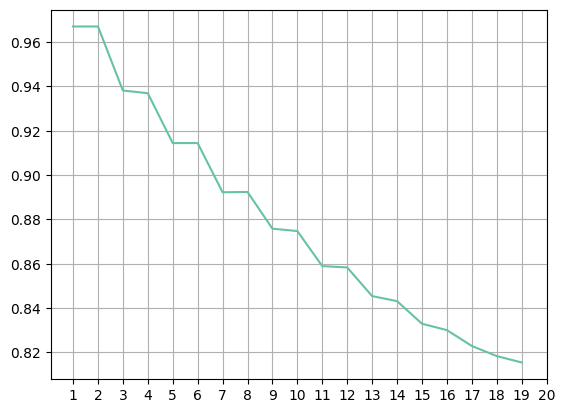

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=5)
    knn_scores.append(scores.mean())

x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot([k for k in range(1,20)],knn_scores)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1410
           1       0.95      1.00      0.97      1410

    accuracy                           0.97      2820
   macro avg       0.97      0.97      0.97      2820
weighted avg       0.97      0.97      0.97      2820



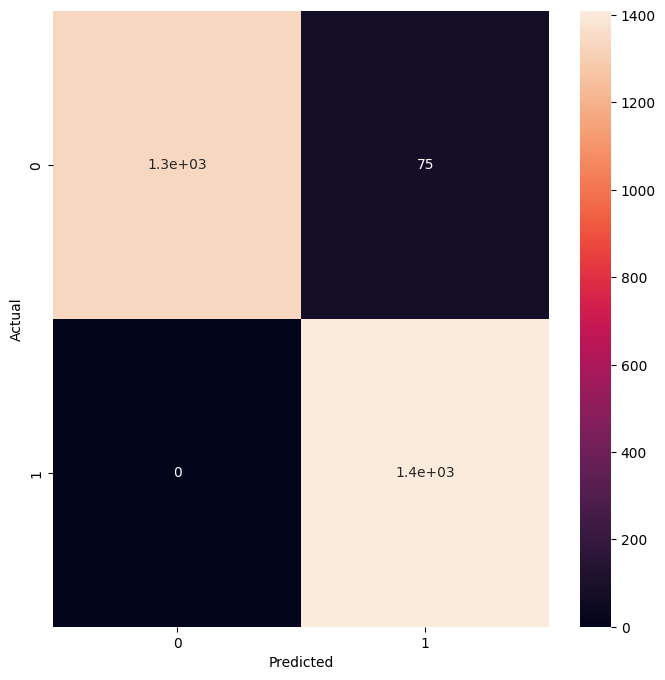

In [ ]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
confusion_knn=confusion_matrix(y_test,knn.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
from sklearn.metrics import classification_report
print(classification_report(y_test,knn.predict(X_test)))

## 👉 | Support Vector Machine - 99% acc

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1410
           1       1.00      1.00      1.00      1410

    accuracy                           1.00      2820
   macro avg       1.00      1.00      1.00      2820
weighted avg       1.00      1.00      1.00      2820



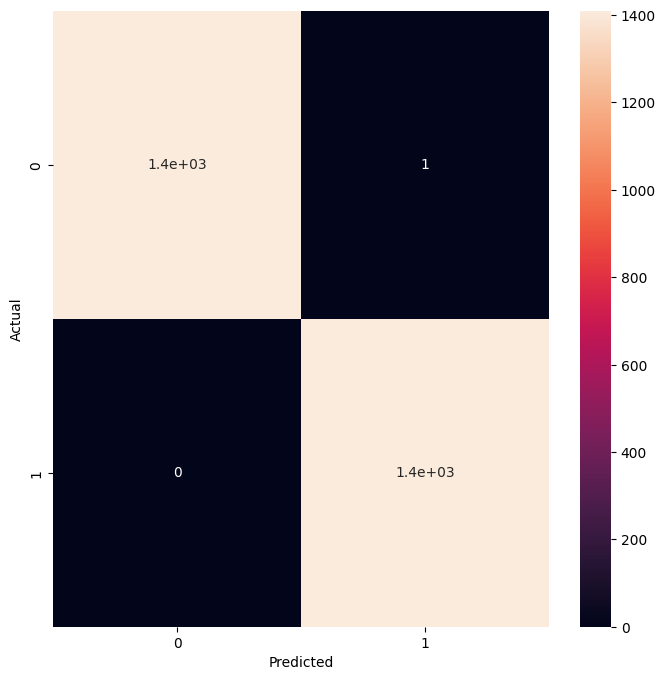

In [ ]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
rcv=RandomizedSearchCV(SVC(),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_svc=rcv.predict(X_test)
confusion_svc=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_svc))

## 👉 | Logistic Regression - 77% acc

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1410
           1       0.75      0.80      0.77      1410

    accuracy                           0.77      2820
   macro avg       0.77      0.77      0.77      2820
weighted avg       0.77      0.77      0.77      2820



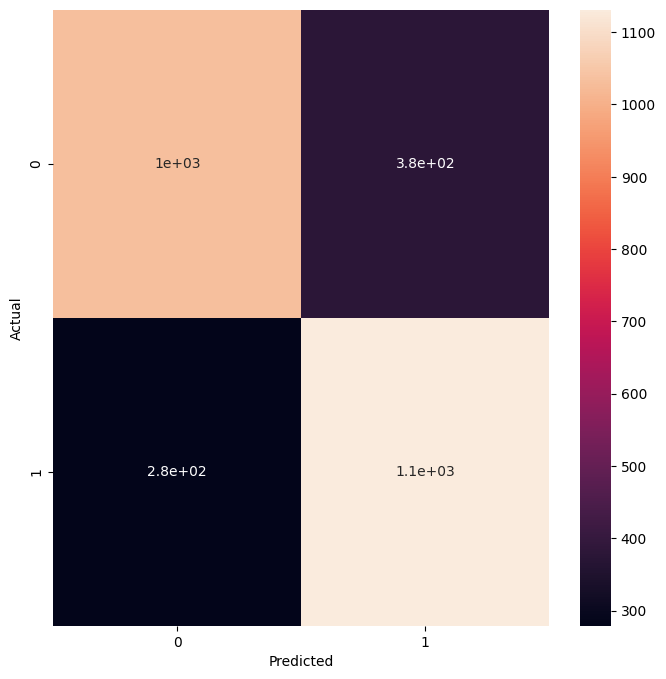

In [ ]:
import warnings
warnings.filterwarnings('ignore')
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'max_iter':[50,75,100,200,300,400,500,700]}
log=RandomizedSearchCV(LogisticRegression(solver='lbfgs'),param_grid,cv=5)
log.fit(X_train,y_train)
y_pred_log=log.predict(X_test)
confusion_log=confusion_matrix(y_test,log.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_log,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_log))

## 👉 | Random Forest Classifier - 99% acc

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1410
           1       0.98      1.00      0.99      1410

    accuracy                           0.99      2820
   macro avg       0.99      0.99      0.99      2820
weighted avg       0.99      0.99      0.99      2820



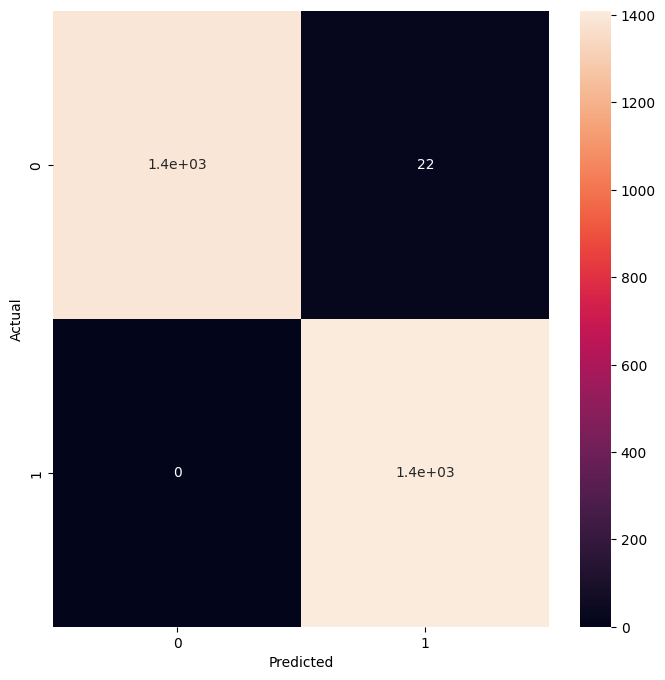

In [ ]:
param_grid = {
'n_estimators': [50, 75,100, 150, 200,300],
}
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_test)
confusion_rcv=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_rcv,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_rcv))

## 👉 | Gradient Boosting Classifier - 97% acc

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1410
           1       0.96      1.00      0.98      1410

    accuracy                           0.98      2820
   macro avg       0.98      0.98      0.98      2820
weighted avg       0.98      0.98      0.98      2820



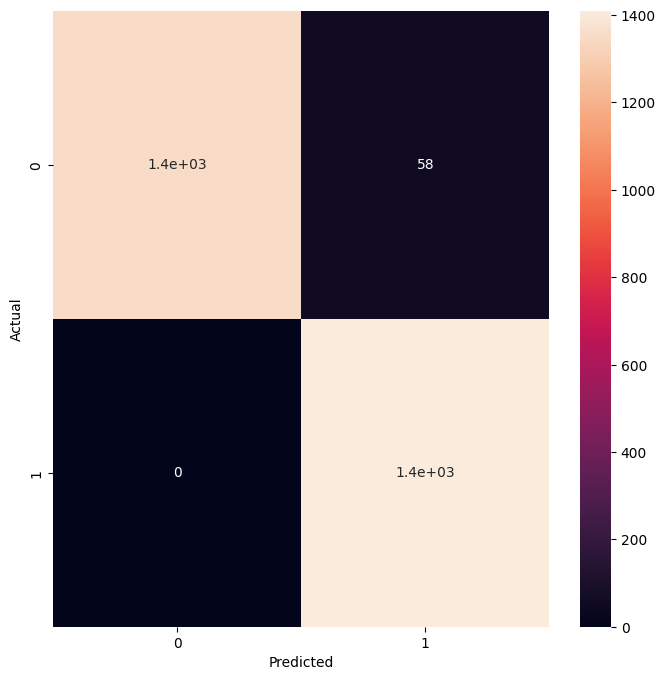

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {
    'learning_rate' : [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
    'n_estimators': [50, 75,100, 150, 200,300],
}

gbc=RandomizedSearchCV(GradientBoostingClassifier(random_state=42),param_grid,cv=5)
gbc.fit(X_train,y_train)
y_pred_gbc=gbc.predict(X_test)
confusion_gbc=confusion_matrix(y_test,y_pred_gbc)
plt.figure(figsize=(8,8))
sns.heatmap(confusion_gbc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_gbc))

## 👉 | LGBM Classifier - 96% acc

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3289, number of negative: 3289
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 625
[LightGBM] [Info] Number of data points in the train set: 6578, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1410
           1       0.93      1.00      0.96      1410

    accuracy                           0.96      2820
   macro avg       0.97      0.96      0.96      2820
weighted avg       0.97      0.96      0.96      2820



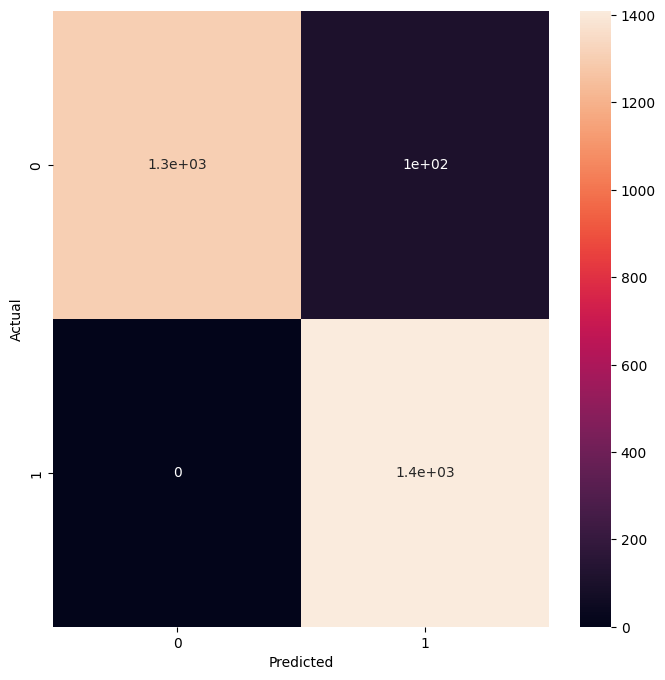

In [ ]:
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
confusion=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(confusion,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred))



---



👉 | CNN

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X=df_final.drop(['stroke'],axis=1)
y=df_final['stroke']
X_over, y_over = oversample.fit_resample(X, y)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,test_size=0.3,stratify=y_over,random_state=42)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Escalamos los datos de entrenamiento
X_test_scaled = scaler.transform(X_test) # Escalamos los datos de prueba

# Definir el modelo de la red neuronal
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],))) # Ajustamos la entrada a la cantidad de características
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1)) # capa de salida

model.summary()

#optimizador:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compilar el modelo
model.compile(optimizer=optimizer,
              loss='mean_squared_error'  #función de pérdida
              )

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train, epochs=400, batch_size=32, validation_split=0.1)


Epoch 1/400
185/185 [==============================] - 4s 6ms/step - loss: 0.1623 - val_loss: 0.1355
Epoch 2/400
185/185 [==============================] - 1s 4ms/step - loss: 0.1329 - val_loss: 0.1183
Epoch 3/400
185/185 [==============================] - 1s 3ms/step - loss: 0.1185 - val_loss: 0.1094
Epoch 4/400
185/185 [==============================] - 1s 6ms/step - loss: 0.1080 - val_loss: 0.1068
Epoch 5/400
185/185 [==============================] - 2s 8ms/step - loss: 0.1017 - val_loss: 0.0996
Epoch 6/400
185/185 [==============================] - 1s 3ms/step - loss: 0.0937 - val_loss: 0.0911
Epoch 7/400
185/185 [==============================] - 0s 2ms/step - loss: 0.0873 - val_loss: 0.0856
Epoch 8/400
185/185 [==============================] - 0s 2ms/step - loss: 0.0800 - val_loss: 0.0783
Epoch 9/400
185/185 [==============================] - 0s 2ms/step - loss: 0.0766 - val_loss: 0.0815
Epoch 10/400
185/185 [==============================] - 0s 2ms/step - loss: 0.0714 - val_lo

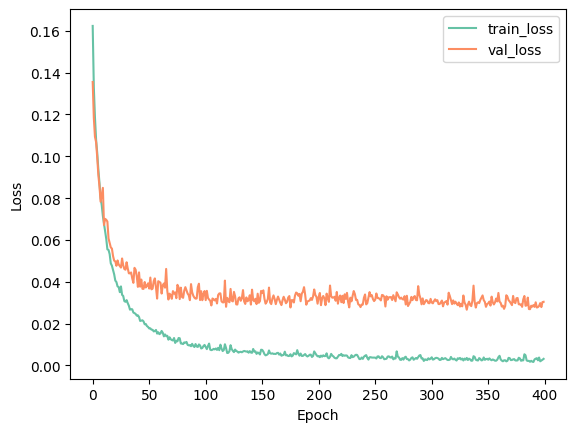

In [ ]:
# Graficar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Calculamos el error en el conjunto de prueba
Y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio en el conjunto de prueba:", mse)

89/89 [==============================] - 0s 1ms/step
Error cuadrático medio en el conjunto de prueba: 0.03723404255319149


In [ ]:
# Guardamos el modelo
model.save('/content/gdrive/MyDrive/Colab Notebooks/Data Science/AMS/modelo_Sroke.h5')



---

